In [83]:
import requests
import pandas as pd
import time
import json

In [105]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

     |████████████████████████████████| 63 kB 1.5 MB/s eta 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8487 sha256=61e80ece25e49daab89bd2bbc96a269ca65dfbaa525f4705417d70660924b13b
  Stored in directory: /private/var/folders/fk/hxn7jjq17_s5ynj4mmxsdl2m0000gn/T/pip-ephem-wheel-cache-ez_xu9mf/wheels/21/c9/66/b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking
  Attempting uninstall: requests
    Found existing installation: requests 2.24.0
    Uninstalling requests-2.24.0:
      Successfully uninstalled requests-2.24.0


In [84]:
# 4391 - Taxa CDI % mês início 31/07/1986
# 7832 - Ibov variação mensal início 31/01/1987
codigos_bcb = {
    'cdi_mensal': 4391,
    'ibov_mensal': 7832
}

def consulta_bcb(cod):
    url_bcb = "http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json".format(cod)
    df = pd.read_json(url_bcb)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

In [102]:
# 'IFIX' - IFIX
# 'IVVB11.SA' - IVVB11
codigos_yahoo = {
    'ifix': 'IFIX',
    'ivvb': 'IVVB11.SA'
}

def consulta_yahoo(cod):
    # max 100 queries per day
    url_yahoo = "https://yfapi.net/v8/finance/spark"
    querystring = {"symbols":"{}".format(cod), "range":"max", "interval":"1mo"}
    headers = {'x-api-key': "hoRogxFM0u7LU9bnHOkGj3HIgv0zovCi2jq4kBLx"}

    response = requests.request("GET", url_yahoo, headers=headers, params=querystring)
    if (response.status_code != 200):
        print("Erro")
    
    j = response.json()[cod]

    filtered = {k: j[k] for k in j.keys() & {'timestamp', 'close'}}
    format_timestamp = [time.strftime("%Y-%m-%d", time.localtime(k)) for k in filtered['timestamp']]

    filtered['timestamp'] = format_timestamp

    df = pd.DataFrame.from_dict(filtered)
    df.set_index('timestamp', inplace=True)

    return df

<AxesSubplot:xlabel='timestamp'>

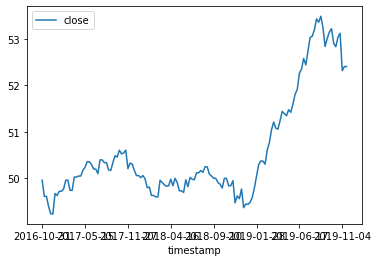

In [103]:
ifix = consulta_yahoo(codigos_yahoo['ifix'])
ifix.plot()

<AxesSubplot:xlabel='data'>

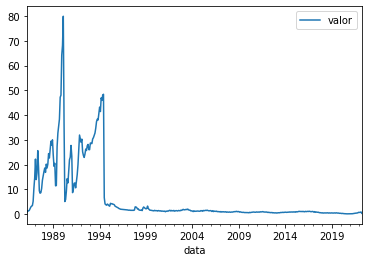

In [87]:
cdi = consulta_bcb(codigos_bcb['cdi_mensal'])
cdi.plot()

<AxesSubplot:xlabel='data'>

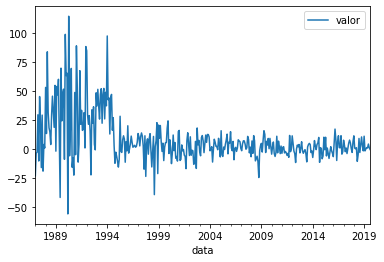

In [88]:
ibov = consulta_bcb(codigos_bcb['ibov_mensal'])
ibov.plot()

<AxesSubplot:xlabel='timestamp'>

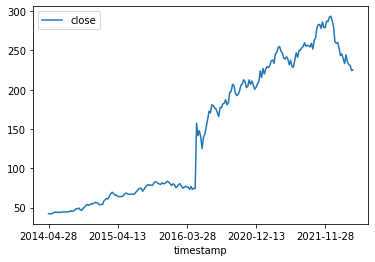

In [89]:
ivvb = consulta_yahoo(codigos_yahoo['ivvb'])
ivvb.plot()

In [106]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [108]:
ibov_retorno = ibov.pct_change()
ibov_ret_acumulado = (1 + ibov_retorno).cumprod()
ibov_ret_acumulado.iloc[0] = 1

<AxesSubplot:xlabel='Date'>

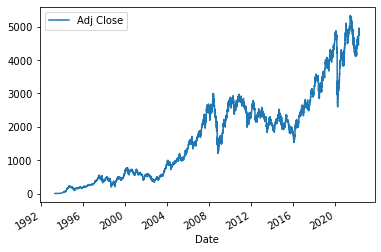

In [110]:
yifix = yf.download(tickers='IFIX.SA')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [111]:
yifix

,Adj Close
Date,
2022-04-14,2808.600098
